# Analizing the GEANT network with Shaolin

* Guillem Duran Ballester
* Dirigit per: Antoni Elias Fusté 

In [39]:
#run this to widen the screen
%%HTML
<style>
.container{width:75% !important;}
text_cell_rendered_html{width:20% !important;}
</style>

SyntaxError: invalid syntax (<ipython-input-39-965256ec56c8>, line 2)

# 1. Introduction

This is a practical example of how to use an interactive graph analizer. We will focus our efforts in explaining the basics concepts of graph theory such as:

- What is a graph/network.
- How can it be used to model relationships.
- Graph metrics: what are they and how to use them.
- Graph visualization.


## 1.1 Dependencies

Four packages will be needed in order to perform the following analysis:

- Numpy.
- Pandas.
- Networkx.
- Shaolin.


### Numpy and pandas

These two packages are the core of almost every data analysis tool for in-memory data. They will be used to perform the necessary calculations and data munging needed by our graph analyzer. 
If you want to know more about these packages you mayu find useful this <a href="http://nbviewer.jupyter.org/github/phelps-sg/python-bigdata/blob/master/src/main/ipynb/numerical-slides.ipynb">Numpy tutorial</a> and <a href="https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-and-IPython-Notebooks">a bunch of interesting Ipython Notebooks</a>

### What is shaolin?

<img src="geant_data/shaolin.png" style="height:10em;width:50em;"></img>

Shaolin is a package that allows to build ipywidgets interfaces for the jupyter notebook. in the next cells you can find a demo video of how it works, and links with references and documentation.

In [2]:
import io
import base64
from IPython.display import HTML

In [3]:
video = io.open('geant_data/videos/science.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/avi;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

#### For more information
- **Shaolin code&examples**: https://github.com/HCsoft-RD/shaolin

- **Interactive Data Kung Fu with Shaolin video:** https://www.youtube.com/watch?v=hnp-bvizDOA

- **EP2016 materials:** https://github.com/Guillem-db/Data-Kung-Fu-talk-EP2016

### Networkx

This is the most used network analysis package available in python. It allows us to build and process graphs. <a href="https://networkx.readthedocs.io/en/stable/">Here</a> you can find all its documentation. 

# 2. The GEANT Network

The <a href="https://en.wikipedia.org/wiki/G%C3%89ANT">GEANT</a> is the pan-European data network for the research and education community. We will analyse how this networks for collaborative research spreads across europe. As we weren't able to find a database with its nodes and interconnections, we will use the following two images to infer the structure of the network.

<img src="geant_data/geant_routers.png">

This first image corresponds to the GEANT network's topology a fer years ago. We will be partially using this image because it offers an alternative classifications of the nodes, assigning one of four different colors to each country. This way we will have some extra data to process. 

<img src="geant_data/geant_last.png"></img>

The image above is the actual topology of the network by october 2015. As you can see, this image is focused on showing the available bandwitdh of each link. The number of nodes has been increased and some links are different in the two images, so we will be using the topology of the second image and the country classification of the first one.

# 2.1  Networks & graph theory

<img src="geant_data/graph.png" width="200px" height="150px">



A <a href="https://en.wikipedia.org/wiki/Graph_theory">Graph</a> is a mathematical structure comprised of vertex or nodes that are connected by edges. A network is a graph which has properties assigned to its nodes and vertex. They are very useful because they model really well realtionships. In this case we will construct a network containing the information about the GEANT network. This way we will have a mathematical structure that will allow us to make calculations and extract aditional information from the data in the two pictures. 

# 3. Building the network

We will start by constructing a dictionary containing the information related to each node of the images. As you can see we are assigning each node the following attributes:

- Two letters node name.
- Country name.
- Node type (from image 1)

In [4]:
nordunet = {'IS':{'name':'IS',
                    'country':'Iceland',
                    'n_type':'NORDUnet',
                   },
            'NO':{'name':'NO',
                    'country':'Norway',
                    'n_type':'NORDUnet',
                   },
            'SE':{'name':'SE',
                    'country':'Sweden',
                    'n_type':'NORDUnet',
                   },
            'FI':{'name':'FI',
                    'country':'Finland',
                    'n_type':'NORDUnet',
                   },
            }

nren_pop = {'MT':{'name':'MT',
                    'country':'Malta',
                    'n_type':'NREN PoP',
                   },
            'MT':{'name':'MT',
                    'country':'Malta',
                    'n_type':'NREN PoP'
                   },
            'CY':{'name':'CY',
                    'country':'Cyprus',
                    'n_type':'NREN PoP'
                   },
            'IL':{'name':'IL',
                    'country':'Israel',
                    'n_type':'NREN PoP'
                   },
            'CY':{'name':'CY',
                    'country':'Cyprus',
                    'n_type':'NREN PoP'
                   },
            'TR':{'name':'TR',
                    'country':'Turkey',
                    'n_type':'NREN PoP'
                   },
            'MK':{'name':'MK',
                    'country':'Macedonia',
                    'n_type':'NREN PoP'
                   },
            'ME':{'name':'ME',
                    'country':'Montenegro',
                    'n_type':'NREN PoP'
                   },
            'RS':{'name':'ME',
                    'country':'Serbia',
                    'n_type':'NREN PoP'
                   },
            }

routerless = {'PT':{'name':'PT',
                    'country':'Portugal',
                    'n_type':'Routerless'
                   },
              'IE':{'name':'IE',
                    'country':'Ireland',
                    'n_type':'Routerless'
                   },
              'BE':{'name':'BE',
                    'country':'Belgium',
                    'n_type':'Routerless'
                   },
              'SK':{'name':'SK',
                    'country':'Slovakia',
                    'n_type':'Routerless'
                   },
              'SI':{'name':'SI',
                    'country':'Slovenia',
                    'n_type':'Routerless'
                   },
              'HR':{'name':'HR',
                    'country':'Croatia',
                    'n_type':'Routerless'
                   },
              'LU':{'name':'LU',
                    'country':'Luxembourg',
                    'n_type':'Routerless'
                   },
              #'RU':{'name':'RU',
              #      'country':'Russia',
              #      'n_type':'Routerless'
              #     },
               'BY':{'name':'BY',
                    'country':'Belarus',
                    'n_type':'No info'
                   },
              'UA':{'name':'UA',
                    'country':'Ukraine',
                    'n_type':'No info'
                   },
               'MD':{'name':'MD',
                    'country':'Moldova',
                    'n_type':'No info'
                   },
             }

routers = {'ES':{'name':'ES',
               'country':'Spain',
               'n_type':'Router'
              },
         'IT':{'name':'IT',
               'country':'Italy',
               'n_type':'Router'
              },
         'FR_1':{'name':'FR_1',
               'country':'France',
               'n_type':'Router'
              },
        'FR_2':{'name':'FR_2',
               'country':'France',
               'n_type':'Router'
              },
         'CH':{'name':'CH',
               'country':'Switzerland',
               'n_type':'Router'
              },
         'UK':{'name':'UK',
               'country':'United Kingdom',
               'n_type':'Router'
              },
         'GR':{'name':'GR',
               'country':'Greece',
               'n_type':'Router'
              },
         'BG':{'name':'BG',
               'country':'Bulgaria',
               'n_type':'Router'
              },
         'RO':{'name':'RO',
               'country':'Romania',
               'n_type':'Router'
              },
         'HU':{'name':'RO',
               'country':'Hungary',
               'n_type':'Router'
              },
         'AT':{'name':'AT',
               'country':'Austria',
               'n_type':'Router'
              },
         'CZ':{'name':'CZ',
               'country':'Czech Republic',
               'n_type':'Router'
              },
         'DE_1':{'name':'DE_1',
               'country':'Germany',
               'n_type':'Router'
              },
         'DE_2':{'name':'DE_2',
               'country':'Germany',
               'n_type':'Router'
              },
         'PL':{'name':'PL',
               'country':'Poland',
               'n_type':'Router'
              },
         'NL':{'name':'NL',
               'country':'Netherlands',
               'n_type':'Router'
              },
         'DK':{'name':'DK',
               'country':'Denmark',
               'n_type':'Router'
              },
         'EE':{'name':'EE',
               'country':'Estonia',
               'n_type':'Router'
              },  
        'LT':{'name':'LT',
               'country':'Lithuania',
               'n_type':'Router'
              },
        'LV':{'name':'LV',
               'country':'Latvia',
               'n_type':'Router'
              },
        }
routers.update(routerless)
routers.update(nren_pop)
routers.update(nordunet)

This dictionary will be use to define the nodes of our network. In order to build a network with networkx, we will first construct a graph with our node dictionary.

In [5]:
import networkx as nx
g = nx.Graph()
for key,val in routers.items():
    g.add_node(key,**val)

Once we have defined the nodes of our network we will define how they are connected to each other. Each edge has two attributes:
- Bandwith.
- Weight.

This means that the bandwith(Gbps) of each node is saved and a weight inversely proportional to its bandwith is also supplied. 

Each of the following lines of code will add a edge to our network:

In [6]:
#multiples of 100
g.add_edge('ES','FR_2',bw='100Gbps',weight=1/100.)
g.add_edge('UK','FR_1',bw='100Gbps',weight=1/100.)
g.add_edge('UK','BE',bw='100Gbps',weight=1/100.)
g.add_edge('FR_1','CH',bw='100Gbps',weight=1/100.)
g.add_edge('FR_2','CH',bw='100Gbps',weight=1/100.)
g.add_edge('IT','CH',bw='100Gbps',weight=1/100.)
g.add_edge('IT','AT',bw='100Gbps',weight=1/100.)
g.add_edge('AT','DE_1',bw='100Gbps',weight=1/100.)
g.add_edge('SK','AT',bw='100Gbps',weight=1/100.)
g.add_edge('SI','AT',bw='100Gbps',weight=1/100.)
g.add_edge('HR','SI',bw='100Gbps',weight=1/100.)
g.add_edge('HU','HR',bw='100Gbps',weight=1/100.)
g.add_edge('HU','SK',bw='100Gbps',weight=1/100.)
g.add_edge('HU','DE_1',bw='100Gbps',weight=1/100.)
g.add_edge('CH','DE_1',bw='100Gbps',weight=1/100.)
g.add_edge('CZ','DE_1',bw='100Gbps',weight=1/100.)
g.add_edge('DE_1','DE_2',bw='100Gbps',weight=1/100.)
g.add_edge('BE','NL',bw='100Gbps',weight=1/100.)
g.add_edge('NL','DE_1',bw='100Gbps',weight=1/100.)
g.add_edge('NL','DE_2',bw='100Gbps',weight=1/100.)
g.add_edge('DK','DE_2',bw='100Gbps',weight=1/100.)
g.add_edge('NO','DK',bw='100Gbps',weight=1/100.)
g.add_edge('SE','NO',bw='100Gbps',weight=1/100.)
g.add_edge('SE','DK',bw='100Gbps',weight=1/100.)
g.add_edge('FI','SE',bw='100Gbps',weight=1/100.)
#multiples of 10
g.add_edge('ES','PT',bw='10Gbps',weight=1/10.)
g.add_edge('ES','FR_1',bw='10Gbps',weight=1/10.)
g.add_edge('PT','UK',bw='10Gbps',weight=1/10.)
g.add_edge('IE','UK',bw='10Gbps',weight=1/10.)
g.add_edge('IS','DK',bw='10Gbps',weight=1/10.)
g.add_edge('IL','UK',bw='10Gbps',weight=1/10.)
g.add_edge('IL','DE_1',bw='10Gbps',weight=1/10.)
g.add_edge('NL','LU',bw='10Gbps',weight=1/10.)
g.add_edge('LU','DE_1',bw='10Gbps',weight=1/10.)
g.add_edge('MT','IT',bw='10Gbps',weight=1/10.)
g.add_edge('GR','IT',bw='10Gbps',weight=1/10.)
g.add_edge('GR','AT',bw='10Gbps',weight=1/10.)
g.add_edge('HR','AT',bw='10Gbps',weight=1/10.)
g.add_edge('BG','AT',bw='10Gbps',weight=1/10.)
g.add_edge('BG','HU',bw='10Gbps',weight=1/10.)
g.add_edge('BG','RO',bw='10Gbps',weight=1/10.)
g.add_edge('RO','HU',bw='10Gbps',weight=1/10.)
g.add_edge('RO','AT',bw='10Gbps',weight=1/10.)
g.add_edge('TR','DE_1',bw='10Gbps',weight=1/10.)
g.add_edge('TR','HU',bw='10Gbps',weight=1/10.)
g.add_edge('RS','HU',bw='10Gbps',weight=1/10.)
g.add_edge('EE','DE_2',bw='10Gbps',weight=1/10.)
g.add_edge('EE','LV',bw='10Gbps',weight=1/10.)
g.add_edge('LV','LT',bw='10Gbps',weight=1/10.)
g.add_edge('LT','PL',bw='10Gbps',weight=1/10.)
g.add_edge('CZ','PL',bw='10Gbps',weight=1/10.)
g.add_edge('CZ','DE_1',bw='10Gbps',weight=1/10.)
#Less than 10GB
g.add_edge('IS','UK',bw='1Gbps',weight=1.)
g.add_edge('UK','CY',bw='1Gbps',weight=1.)
g.add_edge('CY','DE_1',bw='1Gbps',weight=1.)
g.add_edge('BY','PL',bw='1Gbps',weight=1.)
g.add_edge('UA','PL',bw='1Gbps',weight=1.)
g.add_edge('MD','RO',bw='1Gbps',weight=1.)
g.add_edge('MK','BG',bw='1Gbps',weight=1.)
g.add_edge('ME','HU',bw='1Gbps',weight=1.)

Now we have defined our networks as a networkx graph. It is possible to access the node and edge values of our network as attributes of the networkx graph.

In [7]:
g.node,g.edge

({'AT': {'country': 'Austria', 'n_type': 'Router', 'name': 'AT'},
  'BE': {'country': 'Belgium', 'n_type': 'Routerless', 'name': 'BE'},
  'BG': {'country': 'Bulgaria', 'n_type': 'Router', 'name': 'BG'},
  'BY': {'country': 'Belarus', 'n_type': 'No info', 'name': 'BY'},
  'CH': {'country': 'Switzerland', 'n_type': 'Router', 'name': 'CH'},
  'CY': {'country': 'Cyprus', 'n_type': 'NREN PoP', 'name': 'CY'},
  'CZ': {'country': 'Czech Republic', 'n_type': 'Router', 'name': 'CZ'},
  'DE_1': {'country': 'Germany', 'n_type': 'Router', 'name': 'DE_1'},
  'DE_2': {'country': 'Germany', 'n_type': 'Router', 'name': 'DE_2'},
  'DK': {'country': 'Denmark', 'n_type': 'Router', 'name': 'DK'},
  'EE': {'country': 'Estonia', 'n_type': 'Router', 'name': 'EE'},
  'ES': {'country': 'Spain', 'n_type': 'Router', 'name': 'ES'},
  'FI': {'country': 'Finland', 'n_type': 'NORDUnet', 'name': 'FI'},
  'FR_1': {'country': 'France', 'n_type': 'Router', 'name': 'FR_1'},
  'FR_2': {'country': 'France', 'n_type': 'Rout

You can also look at the plot below to see a visual representation of the information contained in our network. The nodes, that represent each country, are colored by its node type. On the other hand, the edges are colored by the capacity of each link. 

In [60]:
import pickle
from bokeh.io import output_notebook

with open('geant_graph.pck', 'wb') as handle:
    pickle.dump(g, handle, protocol=pickle.HIGHEST_PROTOCOL)
output_notebook(hide_banner=True)
with open('geant_data/geant_generic.pck', 'rb') as handle:
    geant_generic = pickle.load(handle)
with open('geant_data/geant_degree.pck', 'rb') as handle:
    geant_degree = pickle.load(handle)
with open('geant_data/geant_betweenness.pck', 'rb') as handle:
    geant_betweenness = pickle.load(handle)    
with open('geant_data/geant_betweenness_new.pck', 'rb') as handle:
    geant_bc_new = pickle.load(handle)    


In [40]:
from IPython.core.display import HTML
HTML(geant_generic)

# 4. Exploring the metrics

In order to get a better intuition on how this network is connected, we will start exploring the metrics of this graph. A metric is a number that allows us to compare two given nodes (or edges) in order to tell which one is better according to a given criteria. As we won't always be able to visualize a network in detail, it comes really in handy to have certain quantities that allow us to describe a graph in a numerical way. 

## 4.1 The GraphCalculator

It is possible to do so by using the networkx library, but in this tutorial we will use the Graphcalculator. This is a python object that allows us to perform several calculations on graphs and easily manage the information related to its nodes, edges, or metrics.  

In [41]:
from shaolin_graphs import GraphCalculator
geant = GraphCalculator(g,metrics=True)


Now all the information related to the network will be stored in DataFrames, so it will be a lot easier to analize. We can access all the node realated information by accessing the *node* attribute of the GraphCalculator.

In [42]:
def to_numeric(x):
    try:
        return float(x)
    except:
        return x
node = geant.node.copy().applymap(to_numeric)
node.head()

betweenness  betweenness_rank  betweenness_weighted  \
AT     0.239936               1.0              0.219391   
BE     0.010192              21.0              0.067500   
BG     0.052821              11.0              0.050000   
BY     0.000000              40.0              0.000000   
CH     0.147244               7.0              0.214979   

    betweenness_weighted_rank  closeness  closeness_rank      country  degree  \
AT                        3.0   0.384615            39.0      Austria     8.0   
BE                       11.0   0.296296            23.0      Belgium     2.0   
BG                       17.0   0.303030            25.0     Bulgaria     4.0   
BY                       40.0   0.217391             2.0      Belarus     1.0   
CH                        4.0   0.366972            36.0  Switzerland     4.0   

    degree_cent  degree_cent_rank  ...    eccentricity_weighted  \
AT        0.200               2.0  ...                      5.0   
BE        0.050              31.0  ...                      5.0   
BG        0.100              11.0  ...                      6.0   
BY        0.025              40.0  ...                      7.0   
CH        0.100              11.0  ...                      5.0   

    eccentricity_weighted_rank  eigenvector  eigenvector_rank  \
AT                        15.0     0.394752               1.0   
BE                        15.0     0.067211              22.0   
BG                        34.0     0.242813               4.0   
BY                        40.0     0.006732              39.0   
CH                        15.0     0.164856              10.0   

    eigenvector_weighted  eigenvector_weighted_rank      n_type  name  label  \
AT              0.002425                       21.0      Router    AT     AT   
BE              0.003699                       16.0  Routerless    BE     BE   
BG              0.000935                       24.0      Router    BG     BG   
BY              0.003561                       18.0     No info    BY     BY   
CH              0.002313                       22.0      Router    CH     CH   

    index  
AT    0.0  
BE    1.0  
BG    2.0  
BY    3.0  
CH    4.0  

[5 rows x 25 columns]

The same works for the edge attributes. Note that the edge index is numbered by integers so it can also work with Multigraphs. We will also assign a MultiIndex to the edge DataFrame because in this case all the edges are unique.

In [43]:
import pandas as pd
edge = geant.edge.copy().applymap(to_numeric)
src= edge['src'].values
dst = edge['dst'].values
new_i = pd.MultiIndex.from_arrays([src,dst])
new_i.levels[0].name = 'src'
new_i.levels[1].name = 'dst'
edge.index = new_i
edge.head()

edge_current_flow_betweenness_centrality      bw  \
src dst                                                      
RS  HU                                         NaN  10Gbps   
EE  DE_2                                       NaN  10Gbps   
    LV                                         NaN  10Gbps   
LU  DE_1                                       NaN  10Gbps   
    NL                                         NaN  10Gbps   

          edge_betweenness_centrality  weight  edge_betweenness src   dst  
src dst                                                                    
RS  HU                       0.013638     0.1          0.013638  RS    HU  
EE  DE_2                     0.028100     0.1          0.028100  EE  DE_2  
    LV                       0.018598     0.1          0.018598  EE    LV  
LU  DE_1                     0.011860     0.1          0.011860  LU  DE_1  
    NL                       0.013994     0.1          0.013994  LU    NL

## 4.2 The degree

The degree of a node is the number of edges that connect to that node. This number tells us how many neighbours a given node has.
When plotted as a distribution it gives us inforation about the structure of the network.


In [44]:
node['degree']

AT       8.0
BE       2.0
BG       4.0
BY       1.0
CH       4.0
CY       2.0
CZ       2.0
DE_1    10.0
DE_2     4.0
DK       4.0
EE       2.0
ES       3.0
FI       1.0
FR_1     3.0
FR_2     2.0
GR       2.0
HR       3.0
HU       8.0
IE       1.0
IL       2.0
IS       2.0
IT       4.0
LT       2.0
LU       2.0
LV       2.0
MD       1.0
ME       1.0
MK       1.0
MT       1.0
NL       4.0
NO       2.0
PL       4.0
PT       2.0
RO       4.0
RS       1.0
SE       3.0
SI       2.0
SK       2.0
TR       2.0
UA       1.0
UK       7.0
Name: degree, dtype: float64

Wer will make a function to better visualize a given metric. This function will create a plot with the values of that metric sorted in descending order.

In [45]:
#%matplotlib inline
import cufflinks as cf
cf.go_offline()
#matplotlib plotting
def plot(metric,nod=True):
    df = node if nod else edge
    size = (10,5) if nod else (20,5)
    _ = df[metric].sort_values(ascending=False).plot(kind='bar',figsize=size,title=metric) 
#plotly plotting
def iplot(metric,nod=True):
    df = node if nod else edge
    size = (10,5) if nod else (20,5)
    return df[metric].sort_values(ascending=False).iplot(kind='bar',title='{} distribution'.format(metric.capitalize()))


In [46]:
meus = iplot('degree')

As you can see, the node withy the highest degree is DE_1, followed by AT and HU. If we only had this information about the network, we could infer that those three nodes are probably playing an important role in the network.

This is a logical result, because if we look at the map of the network these three countries are located at the center of the network.  

Now lets visualize how the degree is distributted across the network by plotting the graph that represents the Geant network. In the following example we have coloured and resized every node according to its degree. 

The higher the degree a node has, the bigger it will be. The colors of each node will range from red(degree 1) to green(degree>8).

In [47]:
HTML(geant_degree)

<img src="geant_data/degree_net.png"></img>

Now you can compare the two plots and see where the highest degree nodes are located, and how the information contained in the degree distribution is can be used to infer the properties of a network. 

## 4.3 Betweenness

The degree is a good measure of the connectivity of a node, but we would also like other metrics. For example, we would like to know how "centric" is a node in a network. Betweenness centrality is a metric that tries to capture this intuition. 

In order to understand betweenness centrality, it is important to know what a shortest path is.

### 4.3.1 Shortest path

The <a href="https://en.wikipedia.org/wiki/Shortest_path_problem">shortest path</a>, roughtly speaking, is the minimum set of edges you have to traverse in a graph in order to go from one node to another. As an example we will show the shortest path associated with going from Spain to Finland:

We will call the shortest_path function from the networkx module with the target graph,the source node, the destination node, and the weigth associated to each edge. If a weight is not provided the algorithm will assign each edge the same weith.

In the geant network graph, each weigth represents the bandwith. As weigths in graph theory represent costs, the more bandwith a given link(edge) has, the less weight will have.

In [48]:
nx.shortest_path(g,'ES','FI')

['ES', 'PT', 'UK', 'IS', 'DK', 'SE', 'FI']

In [49]:
nx.shortest_path(g,'ES','FI','weight')

['ES', 'FR_2', 'CH', 'DE_1', 'DE_2', 'DK', 'SE', 'FI']

We can see that when a weight is provided the shortest path will traverse a higher number of nodes(routers in the network), but if we look at the bandwith associated with each edge, we can see why that happens.

In the weighted path, all the routers traversed are connected with 100Gbps links, while in the unweighted shortest path 1Gbps and 10Gbps links are traversed.

### 4.3.2 Betweenness centrality

The <a href="https://en.wikipedia.org/wiki/Betweenness_centrality">betweenness centrality</a>(BC) is defined as a ratio between shortest paths. For example, if we wanted to calculate the betweenness centrality of the node "DE_1", we whould have to do the following:

1. We would start by calculating all the shortests paths in the graph.We wont take into account paths that start or end in "DE_1".
1. Then, count in how many shortest path appears "DE_1".
1. Finally, divide it by the number of shortests paths.

We can use the <a hrewf="https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html">networkx</a> package to calculate the betweenness centrality of a node. 

In [50]:
print("Betweenness centrality: \n  - Weighted: {:.3}\n  - Unweighted: {:.3}".format(nx.betweenness_centrality(g)['DE_1'],nx.betweenness_centrality(g,weight='weight')['DE_1']))


Betweenness centrality: 
  - Weighted: 0.627
  - Unweighted: 0.645


The betweenness centrality it is also stored in the node DataFrame. We will display the first 5 nodes with more betweenness centrality in descending order.

In [51]:
node['betweenness'].sort_values(ascending=False).head()

DE_1    0.627393
AT      0.239936
DE_2    0.233098
HU      0.207692
CZ      0.165385
Name: betweenness, dtype: float64

We can also plot the betweenness distributions in order to get a graps on how this value is distributed across the network.

In [53]:
iplot('betweenness')

As we can see in the map picture, the nodes with highest BC are geographically located in the center of the network.

### 4.3.3 The concept of weight

In network theory, the weight is a measure of how much it costs to traverse a given edge. It is defined only for edges, and the bigger the weight, the more it will cost to traverse that edge. This means that the weight is a number that will modify the distance between different nodes. 

If our network has weighted edges, the distance between two nodes won't be anymore the number of edges the shortest path traverses. Now the distance will be proportional to the sum of the weights that each traversed edge has. 

As we are working with computer networks, the weight will be inversely proportional to the bandwith that each phisical link has. This means that a given edge, representing a phisical link, will have a high weight value if its bandwith is low. Otherwise, if its bandwith is high, it will be assigned a low weight value.

This weight mesure favours high bandwidth links over low bandwidh links.

In [52]:
node['betweenness_weighted'].sort_values(ascending=False).head()

DE_1    0.645342
DE_2    0.299893
HU      0.226335
AT      0.219391
CH      0.214979
Name: betweenness_weighted, dtype: float64

In [56]:
iplot('betweenness_weighted')

### 4.3.4 Intuitive meaning of betweenness centrality

We have already seen that this metric is closely related to the concept of shortest path. This is only a clever way to capture the intuition of how well connected a node is. 
A node with a high betweenness centrality will tend to be located in the center of the network. This is a measure of how fast I will get get from a given node to any other node in the network.

In the following image we have coloured every node proportionally to its weighted BC, ranging from red(low WBC) to green(high WBC). The size is also proportional to its weighted BC.
There are nodes that exhibit an outer line colored different than its center. This outer color is proportional to its unweighted BC.

<img src="geant_data/btwn_net.png"></img>

In [72]:
HTML(geant_betweenness)

As we can see in the graph, the nodes with high BC tend to have also a high weighted centrality, meaning that "important"(central) nodes in the network are assigned a high bandwidth according to its centrality. The nodes that have two different colors show discrepancies between the importance that a given node would have if all the links had the same bandwith, and the centrality value once the actual bandwith has been taken into account. 

In a network engineering context, this discrepancies have practical effect on the router selected byt the network's routers. As many routing algorithms rely on <a href="https://en.wikipedia.org/wiki/Dijkstra's_algorithm">Dijkstra's_algorithm</a> to choose a route, nodes with high BC will be the ones that will probably have to endure more traffic.

Using the weighted version of the BC is a more realistic approach when it comes to computer networks, as it allows to define a cost for using different interfaces. 

### 4.3.5 Using betweenness centrality

Now that we have a rough understanding of how the betweenness centrality works, we will use this metric to study how the bandwith of the links affect the connectivity of the network. 

As routing protocols tend to used shortest paths measures,we are able to evaluate how assigning a given bandwith to a link will directly influence the amount of traffic that will go through it. 

In the following figure each node is represented as above, and each edge has been represented according to its bandwith. A wider line width means more bandwith. Also a deeper blue indicates a higher bandwith. 

In [71]:
HTML(geant_bc_new)

<img src="geant_data/bc_2.png"></img>

It is easy to think that nodes with high betweenness centrality whould also have a high weighted BC, and vice versa. We can see that this intuition is mostly true, although there are a few nodes where its unweighted Bc and its weighted BC differ.

Lets focus on these nodes, and see if that discrepancies obeys to network design principles. First we will select just the nodes that have discrepancies between its two BC values. 

In [76]:
#sort dataframe by BC
ix = node['betweenness'].sort_values(ascending=False).index
#get only nodes where is weighted and unweighted BC differs. 
#This difference has to be at least 2 rank points
dif_rank = (node['betweenness_rank'] != node['betweenness_weighted_rank']) 
different = ((node['betweenness_rank'] - node['betweenness_weighted_rank']).abs()>2) & dif_rank

Now we want to plot those values, and compare them to see how far are they from that "intuitive" straight line that we mentioined before. We will plot its unweighted BC vs. its weighted BC, and the regression associated with those points. A straight line is also plot for comparison pourposes.

Executing the following cell will create two plots. The first one using plotly where you can use the tooltips and interactive tools to dive into the data. The second one is a satatic matplotlib plot where you can see the regression line. 

linear_regression: m=1.0376024785315472, b=0.0015732732756042244


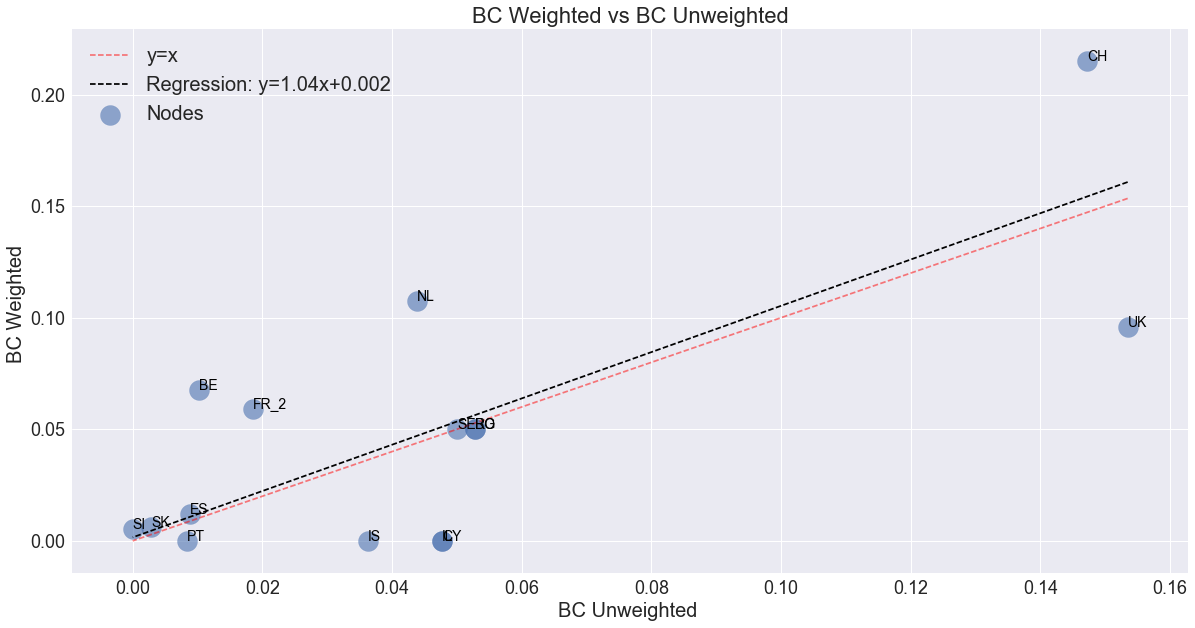

In [101]:
#ye old matplotlib
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib.cm as cm
import numpy as np
#the values that we will plot
x = node.ix[ix,'betweenness']
y = node.ix[ix,'betweenness_weighted']
text = node.ix[ix,'name'].map(str)
#linear regression on the data
m,b = np.polyfit(x, y, 1) 

plt.figure(figsize=(20,10))
#straight line
plt.plot(x.ix[different],x.ix[different],
         '--k',color='red',alpha=0.5, label='y=x')
#regression line and scatter
#plt.plot(x.ix[different].values, y.ix[different].values, 'yo')#no label
plt.plot(x.ix[different],m*x.ix[different]+b
         , '--k',
         label='Regression: y={}x+{}'.format(round(m,2),round(b,3)))
plt.scatter(x.ix[different].values,#this one has labels
            y.ix[different].values,
            label='Nodes',
            s=400,alpha=0.6)
#labels
for x,y,t in zip(x.ix[different].values,
                 y.ix[different].values,
                 text.ix[different].values):
    plt.text(x,y,t,fontdict={'fontsize':14,'color':'black','weight':3})
_ = plt.legend(fontsize=20)

plt.title('BC Weighted vs BC Unweighted', fontsize=22)
plt.xlabel('BC Unweighted ', fontsize=20)
plt.ylabel('BC Weighted ', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
print("linear_regression: m={}, b={}".format(m,b))
#Plotly scatter using cufflinks
node[different].iplot(kind='scatter',
           x='betweenness',
           y='betweenness_weighted',
           mode='markers+text',
           text='name',
           xTitle='BC Unweighted',
           yTitle='BC weighted',
          title='BC Unweighted vs BC Weighted')

After observing these figures we can notice a few things:

If we look at the regression coeficients we can see that it is pretty close to a straight line. This means that the distribution of the studied nodes is pretty simetrical respect an straight line. 

In the lowe graphic the nodes below are nodes that are assigned lower bandwith than our initial thoghts would suggest. On the other hand, the nodes that are above the black line are assigned more bandwith that its greographical locatioin would suggest. 

Globally speaking the the excess bandwith assigned to the nodes above the lines compensated the "lack" of bandwith of the nodes above the line.

In [165]:
filter_inf = lambda x: 7 if np.isinf(x) else x
node['bc_rel'] = (node['betweenness_rank'] \
                  /node['betweenness_weighted_rank']).map(filter_inf).fillna(0)-1
color = lambda x: 0 if x>=0 else 1
node['color_rel'] = node['bc_rel'].map(color).values
df = node[different]
df[['bc_rel','color_rel']].sort_values('bc_rel',ascending=False).iplot(kind='bar',
                                       y='bc_rel',
                                       title='BC ratio over studied nodes',
                                       color='blue',
                                       xTitle='Node',
                                       yTitle='BC Ratio'        
                                      )

In [19]:
%%file shaolin_graphs.py
import numpy as np

import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import planarity

from shaolin.core.dashboard import Dashboard


class LayoutParams(Dashboard):
    """Widget for managing the parameters necessary for the layout calculator.
       It's able to manage all the default basic parameters that networkx takes as input
       
    """
    LAYOUT_PARAMS = {'dim':'both',
                 'scale':1,
                 'center':None,
                 'weigth':None,
                 'fixed':None,
                 'iterations':5000,
                 'prog':'neato',
                 'layout':'draw_graphviz',
                 'k':'exchange'}

    LAYOUTS = {'Circular layout': 'circular_layout',
               'Random layout': 'random_layout',
               'Shell layout':'shell_layout',
               'Spectral layout':'spectral_layout',
               'Spring layout':'spring_layout',
               'Graphviz layout':'draw_graphviz',
               'HCsoft layout':'dh_spring_layout'}
    
    @classmethod
    def default_layout_params(cls):
        return cls.LAYOUT_PARAMS
    @classmethod
    def available_layouts(cls):
        return cls.LAYOUTS
    
    def __init__(self, G, default_params=None,mode='interactive', **kwargs):
        if default_params is None:
            self.params = self.default_layout_params()
        else:
            self.params = default_params
        self._G = G
        dim_opts = {'2D':'2d',
                    '3D':'3d',
                    'Both':'both'}
        edges = G.edges()[0]
        ls_weights = list(G.edge[edges[0]][edges[1]].keys())
        if 'exchange' not in ls_weights:
            ls_weights += ['exchange']
        if 'weight' not in ls_weights:
            ls_weights += ['weight']
        dash = ['c$N=layout_params',
                [
                 '###Layout Params$N=layout_param_title',
                 ['r$N=body_row',['@sel$d=Layout&o='+str(self.available_layouts())\
                                  +'&val='+str(self.params['layout']),
                                  ['c$N=layout_row_1',
                                   [
                                    ['r$N=top_mini_box',
                                     ['@togs$d=Dimension&N=dim&o='+str(dim_opts)+'&val='+str(self.params['dim']),
                                     '@(1e-4,10e4,1,'+str(self.params['scale'])+')$d=Scale',
                                     'text$d=Center&N=center_display&val='+str(self.params['center'])
                                     ]
                                    ],
                                    ['r$N=bot_mini_box',['@selmul$d=Root node&N=fixed_display&o='+str(list(G.nodes())+['None']),
                                                         ['c$N=sub_box_layout',
                                                             ['@dd$d=Weight&o='+str(ls_weights+['None'])+'&val='+str(self.params['weigth']),
                                                              ['r$N=sub_subrow',['@(1,10e4,1,'+str(self.params['iterations'])+')$d=Iterations',
                                                                                 '@dd$N=kmet&d=k&o='+str(ls_weights)+'&val='+str(self.params['k']),
                                                                                 '@(0,1e4,1,0)$N=kfloat&d=k'
                                                                                ]
                                                              ],
                                                              '@togs$d=Prog&o=["neato", "twopi", "fdp", "dot", "circo"]&val='+str(self.params['prog'])
                                                             ]  
                                                         ]                                                                           
                                                        ]
                                    ]
                                  ]
                                 ]
                                ]
                 ]
                ]
               ]
        
        Dashboard.__init__(self, dash,mode=mode, **kwargs)
        self.fixed_display.value = [str(self.params['fixed'])]
        self.observe(self.update_display)
        self.observe(self.update_value)
        self.layout.observe(self.on_layout_change)
        self.update_display()
        #Can inherit a target when not used as a widget
        self.update_value()
        
    
    @property
    def G(self):
        return self._G
    @G.setter
    def G(self, val):
        self._G = val
        self.update()
    
    
    def update_display(self, _=None):
        """Updates the visual attributes of the widget"""
        simple = ['circular_layout', 'random_layout', 'shell_layout']
        if self.layout.value in simple:
            disable = ['prog', 'iterations', 'fixed_display',
                       'weight', 'kmet', 'kfloat']
            for item in disable:
                getattr(self, item).visible = False

        if self.layout.value == 'spectral_layout':
            disable = ['prog', 'iterations',
                       'fixed_display', 'kmet', 'kfloat']
            for item in disable:
                getattr(self, item).visible = False
            self.weight.visible = True

        if self.layout.value == 'spring_layout':
            disable = ['prog', 'kmet']
            for item in disable:
                getattr(self, item).visible = False
            self.weight.visible = True
            self.iterations.visible = True
            self.fixed_display.visible = True
            self.kfloat.visible = True

        if self.layout.value == 'draw_graphviz':
            disable = ['kmet', 'kfloat']
            for item in disable:
                getattr(self, item).visible = False
            self.weight.visible = True
            self.iterations.visible = True
            self.fixed_display.visible = True
            self.prog.visible = True

        if self.layout.value == 'dh_spring_layout':
            disable = ['prog', 'kfloat']
            for item in disable:
                getattr(self, item).visible = False
            self.fixed_display.visible = True
            self.weight.visible = True
            self.iterations.visible = True
            self.fixed_display.visible = True
            self.kmet.visible = True

    def single_val(self, dim=2, _=None):
        """Calculates the layout dict for a given dimension of the layout.
            dim: dimension of the layout we want to calculate its parameters.
            return: an attribute dictionary keyed with the name of the function
                    containing its kwargs
        """
        layout = {}
        simple = ['circular_layout', 'random_layout', 'shell_layout']
        if self.layout.value in simple:
            kwargs = {'dim':dim,
                      'scale':self.scale.value,
                      'center':self.get_center()}

        if self.layout.value == 'spectral_layout':
            kwargs = {'dim':dim,
                      'scale':self.scale.value,
                      'center':self.get_center(),
                      'weight':self.get_weight()}

        if self.layout.value == 'spring_layout':
            kwargs = {'dim':dim,
                      'scale':self.scale.value,
                      'center':self.get_center(),
                      'weight':self.get_weight(),
                      'iterations':int(self.iterations.value),
                      'fixed':self.get_fixed(),
                      'k':self.get_k()}

        if self.layout.value == 'draw_graphviz':
            kwargs = {'prog':self.prog.value,
                      'root':self.get_fixed()}

        if self.layout.value == 'dh_spring_layout':
            kwargs = {'dim':dim,
                      'scale':self.scale.value,
                      'center':self.get_center(),
                      'weight':self.get_weight(),
                      'iterations':int(self.iterations.value),
                      'fixed':self.get_fixed(),
                      'k':self.kmet.value}
        layout[self.layout.value] = kwargs
        return layout

    def get_fixed(self):
        """Gets the fixed value from the text input. it's a way to handle the None"""
        values = self.fixed_display.value
        if values[0] == 'None':
            return None
        else:
            return values

    def get_weight(self):
        """Gets the fixed value from the text input. it's a way to handle the None"""
        value = self.weight.value
        if value == 'None':
            return None
        else:
            return value

    def get_k(self):
        """Gets the k value from the text input. it's a way to handle the None"""
        if self.kfloat.value == 0:
            return None
        else:
            return int(self.kfloat.value)

    def get_center(self):
        """Gets the center value from the text input"""
        import ast
        if self.center_display.value == 'None':
            return None
        else:
            data = ast.literal_eval(self.center_display.value)
            np.array(data)

    def update_value(self, _=None):
        """Updates the target parameter dict for the selected dimensions"""
        dims = {}
        if self.dim.value == '2d':
            dims['2d'] = self.single_val(dim=2)
            dims['3d'] = None
        elif self.dim.value == '3d':
            dims['3d'] = self.single_val(dim=3)
            dims['2d'] = None
        elif self.dim.value == 'both':
            dims['2d'] = self.single_val(dim=2)
            dims['3d'] = self.single_val(dim=3)
        self.output = dims

    def on_value_change(self, _):
        """Trigger for value updater"""
        self.update_value()
    def on_layout_change(self, _):
        """Trigger for value and layout updater"""
        self.update_display()
        self.update_value()


class LayoutCalculator(Dashboard):
    """Calculates an arbitrary layout for a netxorkx Graph
    """

    def __init__(self, G,
                 default_params=None,
                 **kwargs
                ):
        if default_params is None:
            self.default_params = LayoutParams.default_layout_params()
        else:
            self.default_params = default_params
        self._G = G.copy()
        dash = ['c$N=layout_calculator',[LayoutParams(G, name='layout_params'),'btn$N=button&d=Run']]
        Dashboard.__init__(self, dash, **kwargs)
        self.button.observe(self.update)
        self.update()
        
    @property
    def G(self):
        return self._G
    @G.setter
    def G(self, val):
        self._G = val
        self.layout_params.G = val
    

    def update(self, G=None, _=None):
        """Starts the calculations from current LAYOUT_PARAMS"""                                    
        self.calculate_layouts()
        self.node = pd.Panel(self.node)
        self.edge = pd.Panel(self.edge)

    def one_layout(self, func, kwargs):
        """Calculates one arbitrary layout"""
        if 'fixed' in kwargs.keys():
            if not kwargs['fixed'] is None:
                kwargs['pos'] = nx.random_layout(self.G, dim=kwargs['dim'])
        if func == 'dh_spring_layout':
            return self.dh_spring_layout(self.G, **kwargs)
        elif func == 'draw_graphviz':
            return graphviz_layout(self.G, **kwargs)
        else:
            return getattr(nx, func)(self.G, **kwargs)

    def calculate_layouts(self):
        """Will calculate de layout according to its current LAYOUT_PARAMS configuration"""
        only_2d = ['circular_layout', 'shell_layout', 'draw_graphviz', 'graphviz_layout']
        self.node = {}
        self.edge = {}
        # both = self.params.dim.value not in self.params.target.keys()
        if True:#both:
            for sd in ['2d', '3d']:
                fun = list(self.layout_params.output[sd].keys())[0]
                kwargs = self.layout_params.output[sd][fun]
                layout = self.one_layout(fun, kwargs)
                df_ = pd.DataFrame(layout).T
                self.node[sd] = df_.copy()
                if sd == '2d':
                    if len(self.node[sd].columns) == 2:
                    #after the first one the df will have a 'z column filled with nan
                        df_.columns = ['x', 'y']
                        self.node[sd].columns = ['x', 'y']
                    edge_data = [(df_.x[e[0]], df_.y[e[0]], df_.x[e[1]], df_.y[e[1]])
                                 for e in self.G.edges_iter()]
                    edge_index = [e for e in self.G.edges_iter()]
                    self.edge[sd] = pd.DataFrame(index=edge_index,
                                                 data=edge_data,
                                                 columns=['x0', 'y0', 'x1', 'y1']
                                                )
                    self.edge[sd]['cx'] = (self.edge[sd]['x0']+self.edge[sd]['x1'])/2
                    self.edge[sd]['cy'] = (self.edge[sd]['y0']+self.edge[sd]['y1'])/2
                elif sd == '3d':
                    if fun in only_2d:
                        df_['z'] = 0
                        self.node[sd]['z'] = 0
                    if len(self.node[sd].columns) == 3:
                        df_.columns = ['x', 'y', 'z']
                        self.node[sd].columns = ['x', 'y', 'z']
                        
                    edge_data = [(df_.x[e[0]], df_.y[e[0]], df_.z[e[0]],
                                  df_.x[e[1]], df_.y[e[1]], df_.z[e[1]])
                                 for e in self.G.edges_iter()
                                ]
                    edge_index = [e for e in self.G.edges_iter()]
                    self.edge[sd] = pd.DataFrame(index=edge_index,
                                                 data=edge_data,
                                                 columns=['x0', 'y0', 'z0',
                                                          'x1', 'y1', 'z1']
                                                )
                    self.edge[sd]['cx'] = (self.edge[sd]['x0']+self.edge[sd]['x1'])/2
                    self.edge[sd]['cy'] = (self.edge[sd]['y0']+self.edge[sd]['y1'])/2
                    self.edge[sd]['cz'] = (self.edge[sd]['z0']+self.edge[sd]['z1'])/2
        else:#TODO: handle single layout manipulation and arbitrary dimension layoyt
            return

    def dh_spring_layout(self, G,
                         dim=2,
                         k=None,
                         pos=None,
                         fixed=None,
                         iterations=50,
                         weight='weight',
                         scale=1.0,
                         center=None,
                         kname='var'
                        ):
        """Position nodes using a modified spring layout that allows for different k for each node.
           Same interface as nx.spring_layout.
        Parameters
        ----------
        G : NetworkX graph or list of nodes
        dim : int
           Dimension of layout
        k : array (default=None)
           Optimal distance between nodes.  If you want it to make it None
           just use nx.spring_layout.
        pos : dict or None  optional (default=None)
           Initial positions for nodes as a dictionary with node as keys
           and values as a list or tuple.  If None, then use random initial
           positions.
        fixed : list or None  optional (default=None)
          Nodes to keep fixed at initial position.
        iterations : int  optional (default=50)
           Number of iterations of spring-force relaxation
        weight : string or None   optional (default='weight')
            The edge attribute that holds the numerical value used for
            the edge weight.  If None, then all edge weights are 1.
        scale : float (default=1.0)
            Scale factor for positions. The nodes are positioned
            in a box of size [0,scale] x [0,scale].
        center : array-like or None
           Coordinate pair around which to center the layout.
        Returns
        -------
        dict :
           A dictionary of positions keyed by node
        Examples
        --------
        >>> G=nx.path_graph(4)
        >>> pos=nx.spring_layout(G)
        # The same using longer function name
        >>> pos=nx.fruchterman_reingold_layout(G)
        """
        import numpy as np
        def _rescale_layout(pos, scale=1):
            # rescale to (-scale,scale) in all axes
            # shift origin to (0,0)
            lim = 0 # max coordinate for all axes
            for i in range(pos.shape[1]):
                pos[:, i] -= pos[:, i].mean()
                lim = max(pos[:, i].max(), lim)
            # rescale to (-scale,scale) in all directions, preserves aspect
            for i in range(pos.shape[1]):
                pos[:, i] *= scale/lim
            return pos

        def process_params(G, center, dim):
            """ Some boilerplate code."""
            import numpy as np

            if not isinstance(G, nx.Graph):
                empty_graph = nx.Graph()
                empty_graph.add_nodes_from(G)
                G = empty_graph

            if center is None:
                center = np.zeros(dim)
            else:
                center = np.asarray(center)

            if len(center) != dim:
                msg = "length of center coordinates must match dimension of layout"
                raise ValueError(msg)

            return G, center

        G, center = process_params(G, center, dim)

        if fixed is not None:
            nfixed = dict(zip(G, range(len(G))))
            fixed = np.asarray([nfixed[v] for v in fixed])

        if pos is not None:
            # Determine size of existing domain to adjust initial positions
            dom_size = max(np.array(list(pos.values())).flatten())
            shape = (len(G), dim)
            pos_arr = np.random.random(shape) * dom_size + center
            for i, n in enumerate(G):
                if n in pos:
                    pos_arr[i] = np.asarray(pos[n])
        else:
            pos_arr = None

        if len(G) == 0:
            return {}
        if len(G) == 1:
            return {G.nodes()[0]: center}

        try:
            # Sparse matrix
            if len(G) < 500:  # sparse solver for large graphs
                raise ValueError
            A = nx.to_scipy_sparse_matrix(G, weight=weight, dtype='f')
            k = nx.to_scipy_sparse_matrix(G, weight=kname, dtype='f')
            if k is None and fixed is not None:
                # We must adjust k by domain size for layouts that are not near 1x1
                nnodes, _ = A.shape
                k = dom_size / np.sqrt(nnodes)
            pos = _sparse_fruchterman_reingold(A, dim, k, pos_arr, fixed, iterations)
        except:
            A = nx.to_numpy_matrix(G, weight=weight)
            k = nx.to_numpy_matrix(G, weight=kname)
            k = np.asarray(k)
            if k is None and fixed is not None:
                # We must adjust k by domain size for layouts that are not near 1x1
                nnodes, _ = A.shape
                k = dom_size / np.sqrt(nnodes)
            pos = self._fruchterman_reingold(A, dim, k, pos_arr, fixed, iterations)
        if fixed is None:
            pos = _rescale_layout(pos, scale=scale) + center
        pos = dict(zip(G, pos))
        return pos


    def _fruchterman_reingold(self, A, dim=2, k=None, pos=None, fixed=None,
                              iterations=50):
                                  
        def __magics(x,top=1e8,low=1e-18):
            if  x<1:
                val = np.sqrt(1-x)/(1-x)
                return val
            #elif x<=low:
            #    return 0
            else: 
                return top
                
        def __force(M0,dist):
           
            M = pd.DataFrame(dist)
            force = (M.applymap(lambda x: __magics(x)).values-M0)/M0
            return force
        # Position nodes in adjacency matrix A using Fruchterman-Reingold
        # Entry point for NetworkX graph is fruchterman_reingold_layout()
        try:
            import numpy as np
        except ImportError:
            raise ImportError("_fruchterman_reingold() requires numpy: http://scipy.org/ ")

        try:
            nnodes, _ = A.shape
        except AttributeError:
            raise nx.NetworkXError(
                "fruchterman_reingold() takes an adjacency matrix as input")

        A = np.asarray(A) # make sure we have an array instead of a matrix

        if pos is None:
            # random initial positions
            pos = np.asarray(np.random.random((nnodes, dim)), dtype=A.dtype)
        else:
            # make sure positions are of same type as matrix
            pos = pos.astype(A.dtype)

        # optimal distance between nodes
        if k is None:
            k = np.sqrt(1.0/nnodes)

        # the initial "temperature"  is about .1 of domain area (=1x1)
        # this is the largest step allowed in the dynamics.
        # We need to calculate this in case our fixed positions force our domain
        # to be much bigger than 1x1

        #pos.T[0] is the first coordinate of the nnode vector
        t = max(max(pos.T[0]) - min(pos.T[0]), max(pos.T[1]) - min(pos.T[1]))*0.1
        # simple cooling scheme.
        # linearly step down by dt on each iteration so last iteration is size dt.
        dt = t/float(iterations+1)
        delta = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
        umatrix = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
        # the inscrutable (but fast) version
        # this is still O(V^2)
        # could use multilevel methods to speed this up significantly
        for iteration in range(iterations):
            # matrix of difference between points
            for i in range(pos.shape[1]):
                delta[:, :, i] = pos[:, i, None]-pos[:, i]
            # distance between points
            distance = np.sqrt((delta**2).sum(axis=-1))
            # enforce minimum distance of 0.01
            distance = np.where(distance < 0.01, 0.01, distance)
            A = np.where(A < 0.001, 0.001, A)

            for i in range(pos.shape[1]):
                umatrix[:, :, i] = delta[:, :, i]/distance
            # displacement "force"
            #displacement = np.transpose(np.transpose(umatrix)*k*(distance-A)/A).sum(axis=1)
            displacement = np.transpose(np.transpose(umatrix)*k*__force(A,distance)).sum(axis=1)
            
            # update positions
            length = np.sqrt((displacement**2).sum(axis=1))
            length = np.where(length < 0.01, 0.1, length)
            delta_pos = np.transpose(np.transpose(displacement)*t/length)
            if fixed is not None:
                # don't change positions of fixed nodes
                delta_pos[fixed] = 0.0
            pos += delta_pos
            # cool temperature
            t -= dt
        return pos

class MatrixParams(Dashboard):
    """Thi widget handles the parameter for creating the matrix we
    will transform into a graph:
    """
    MATRIX_PARAMS = {'norm_min': 0,
                     'norm_max': 1,
                     'clip_min':1e-5,
                     'clip_max':1e10,
                     'target':[('clip', (1e-5,1e10))],#f[(fun,(kwargs))]
                     }

    TARGET_OPTIONS = {'Raw':'raw', #Do nothing
                      'Clip':'clip', #limit the matrix values betwen (min,max)
                      'Scale':'scale', #scale the matrix values between (min,max)
                      'Zscore':'zscore', #zscore the matrix elements
                      'Distance':'compute_distance', #Convert corr into a distance
                      }

    def __init__(self, default_params=None, **kwargs):
        if default_params is None:
            self.params = self.default_matrix_params()
        else:
            self.params = default_params
        
        dash = ['c$N=matrix_params',
                ['###Matrix params$N=matparams_title',
                 ['r$N=body_box',[
                        ['c$N=mp_num_box',['@(-50.,50.,1.,'+str(float(self.params['norm_min']))+')$N=norm_min&d=Rescale min',
                                           '@(-50.,50.,1.,'+str(float(self.params['norm_max']))+')$N=norm_max&d=Rescale max',
                                           '@[-5e5,2e10,1.,'+str(float(self.params['clip_min']))+']$N=clip_min&d=Clip min',
                                           '@[-5e5,2e10,1.,'+str(float(self.params['clip_max']))+']$N=clip_max&d=Clip max'
                                          ]
                        ],
                        ['c$N=mp_target_box',[['@sel$N=target_selector&d=Transform matrix&o='+str(self.get_target_options())+'&val='+str(self.params['target'][0][0])],
                                              ['r$N=buttonbox',['btn$d=Add','btn$d=Delete']],
                                              ['@texta$N=target_display&val='+str(self.params['target'])]
                                              
                                             ]
                        ]
                 ]
                 ]
                ]
               ]
        
        
                    
        Dashboard.__init__(self, dash, **kwargs)
        self.add.observe(self.on_add_clicked)
        self.delete.observe(self.on_del_clicked)
        self.observe(self.update)
        self.update()

    @classmethod
    def default_matrix_params(cls):
        return cls.MATRIX_PARAMS

    @classmethod
    def get_target_options(cls):
        return cls.TARGET_OPTIONS

    def update(self, _=None):
        """Updates the numeric MATRIX_ATTRIBUTES: max and min values for clip and scale"""
        self.transf_params = {'raw':None,
                                  'clip':(self.clip_min.value,
                                          self.clip_max.value),
                                  'scale':(self.norm_min.value,
                                           self.norm_max.value),
                                  'zscore':None,
                                  'compute_distance':None,
                                 }
        self.output = self.params['target']

    def on_del_clicked(self, _):
        """Trigger for updating the center widget.from del button."""
        self.params['target'].pop()
        self.target_display.value = str(self.params['target'])

    def on_add_clicked(self, _):
        """Trigger for updating the center widget.from del button."""
        key = self.target_selector.value
        new = (key, self.transf_params[key])
        self.params['target'].append(new)
        self.target_display.value = str(self.params['target'])

class GraphParams(Dashboard):
    """Widget for managing the parameters needed to convert a matrix into a graph
        Params:
        ---------------------------------------------------------------------
    """
    GRAPH_PARAMS = {'graph_type':'full',
                   'inverted' :  False,
                   'threshold': 0.00,
                   'target_attr':'exchange'}

    NODE_METRICS = ['betweenness_centrality', 'betweenness', 'degree','degree_centrality', 'degree_weighted',
                    'eigenvector_weighted', 'eigenvector', 'closeness_weighted',
                    'closeness', 'eccentricity_weighted', 'eccentricity']

    NODE_TARGET_ATTRS = {'Simetric max':'M',
                         'Correlation':'corr',
                         'Covariance': 'cov',
                         'Market custom': 'exchange',
                         'k spring': 'k_price',
                         'L0': 'l0',
                         'Simetric min' : 'm'}
    @classmethod
    def default_graph_params(cls):
        return cls.GRAPH_PARAMS
    
    @classmethod
    def default_node_metrics(cls):
        return cls.NODE_METRICS
    
    @classmethod
    def default_target_attributes(cls):
        return cls.NODE_TARGET_ATTRS
    
    def __init__(self, default_params=None,
                 metrics=None,
                 target=None,
                **kwargs):
        if default_params is None:
             params = self.default_graph_params()
        else:
            params = default_params
        if metrics is None:
            metrics = self.default_node_metrics()
        if target is None:
            dict_target_attrs = self.default_target_attributes()
        else:
            dict_target_attrs = target
            
        options = {'Mst':'mst',
                   'Pmfg':'pmfg',
                   'Full Matrix':'full'}
        dash = ['c$N=graph_params',['###Graph params$N=gaphparams_title',
                                  '@togs$d=Graph type&o='+str(options)+'&val='+str(params['graph_type']),
                                  ['r$N=gparams_row',['@[0.,50e10,1,'+str(params['threshold'])+']$N=threshold&d=Abs val threshold',
                                                    '@False$N=inverted&d=Invert distance'
                                                   ]
                                  ],
                                  '@selmul$d=Metrics&o='+str(metrics),
                                  '@dd$N=target_attr&d=Target attribute&o='+str(dict_target_attrs)+'&val='+str(params['target_attr'])
                                 ]
               ]
        Dashboard.__init__(self, dash, **kwargs)
        self.metrics.value = tuple(metrics)



class GraphMaker(object):
    """Transforms a matrix panel into a networkx Graph.
       Parameters
       ----------
       matrix_panel: pd.Panel.-Items axis:list of edge metrics
                              -Major and minor axis: list of node labels
       node_data: pd.Dataframe: Index: Node labels.
                               columns: node metrics.
       threshold: Minimum absolute value for node matrix items.
       matrix_params: see  selectors.wranglers.MatrixParams
       graph_type: kind of transformation in ('full', 'mst', 'pmfg'])
      """
    def __init__(self, matrix_panel,
                 node_data,
                 inv=False,
                 threshold=0.0,
                 matrix_params=[('raw', None)],
                 graph_type='full',
                 target='corr'):

        self.params = matrix_params
        self.panel = matrix_panel
        data = matrix_panel[target].copy()
        self.df_distance = self.calculate_graph_matrix(data,
                                                       matrix_params)
        self.G = self.create_graph(node_data,
                                   graph_type=graph_type,
                                   inv=inv,
                                   threshold=threshold)

    def add_node_info(self, g, key, pds):
        """Inserts the info from node_data into node attributes of the created graph
        """
        new_attributes = map(lambda x: (x[0], x[1]),
                             filter(lambda i: g.has_node(i[0]),
                                    pds.iteritems()
                                   )
                            )
        nx.set_node_attributes(g, key, dict(new_attributes))

    def raw(self, data, attrs=None):
        """Do nothing to the graph matrix"""
        return data

    def zscore(self, data, attrs=None):
        """Zscore the graph matrix"""
        return (data-np.mean(data))/data.std()

    def scale(self, data, attrs):
        """Scale the matrix. Attrs:(min,max)"""
        m, M = attrs
        return ((M-m)*(data-data.min())) / (data.max()-data.min()) + m

    def compute_distance(self, correlation_matrix, attrs):
        """Converts correlation into a distance"""
        return np.sqrt(2 * np.clip(1. - correlation_matrix ** 2, 0., 2.))

    def clip(self, data, attrs):
        """Limit a given matrix between (min,max)"""
        m, M = attrs
        return np.clip(data, m, M)

    def calculate_graph_matrix(self, data, matrix_params):
        """Convert the input matrix into the graph matrix
        applying an arbitrary set of transforms
        """
        for name, attrs in matrix_params:
            func = getattr(self, name)
            data = func(data, attrs)
        return data

    def create_graph(self,
                     data,
                     graph_type='mst',
                     inv=False,
                     threshold=0.0):
        """Converts the calculated graph adjacency matrix into a networkx Graph
        """
        df_distance = self.df_distance
        matrix_panel = self.panel
        if graph_type == 'mst':
            G = self.construct_mst(df_distance, matrix_panel,
                                   inv=inv, threshold=threshold)
            for col in data.columns:
                self.add_node_info(G, col, data[col])
        elif graph_type == 'pmfg':
            G = self.construct_pmfg(df_distance, matrix_panel,
                                    inv=inv, threshold=threshold)
            for col in data.columns:
                self.add_node_info(G, col, data[col])
        else:
            G = self.construct_full_graph(df_distance, matrix_panel,
                                          inv=inv, threshold=threshold)
            for col in data.columns:
                self.add_node_info(G, col, data[col])
        return G

    def construct_full_graph(self, df_distance, matrix_panel, inv=False, threshold=0.0):
        """Creates a graph with the provided adjacency
            matrix inserting all the node and edge metrics into the graph
        """
        if inv:
            df_distance = 1.0/df_distance

        g = nx.Graph()
        names = df_distance.columns.unique()
        for name in names:
            g.add_node(name)

        for i, n in enumerate(names):
            for j, m in enumerate(names):
                if j >= i:
                    break
                val = df_distance.loc[n, m]
                if np.abs(val) > threshold / len(names):
                    edgedict = {'weight': float(val)}
                    for item in matrix_panel.items:
                        edgedict[item] = float(matrix_panel.ix[item, n, m])
                    g.add_edge(n, m, edgedict)
        labels = {}
        for i, n in enumerate(names):
            name = names[i]
            labels[i] = name
        g = nx.relabel_nodes(g, labels)
        return g

    def construct_mst(self, df_distance, matrix_panel, inv=False, threshold=0.0):
        """Trim the provided adjacency matrix to create a Minimum Spanning Tree
            matrix inserting all the node and edge metrics into the graph
        """
        if inv:
            df_distance = 1.0/df_distance
        g = nx.Graph()
        names = df_distance.columns.unique()
        for name in names:
            g.add_node(name)
        for i, n in enumerate(names):
            for j, m in enumerate(names):
                if j >= i:
                    break
                val = df_distance.loc[n, m]
                # Bonferroni correction: TODO check implementation
                if np.abs(val) > threshold / len(names):
                    edgedict = {'weight': float(val)}
                    for item in matrix_panel.items:
                        edgedict[item] = float(matrix_panel.ix[item, n, m])
                    g.add_edge(n, m, edgedict)
        return nx.minimum_spanning_tree(g)

    def construct_pmfg(self, df_distance, matrix_panel, inv=False, threshold=0.0):
        """Trim the provided adjacency matrix to create a Planary Maximum Filtered Graph
            matrix inserting all the node and edge metrics into the graph
        """
        if inv:
            dist_matrix = 1.0/df_distance.values
        else:
            dist_matrix = df_distance.values
        index_upper_triangular = np.triu_indices(dist_matrix.shape[0], 1)
        isort = np.argsort(dist_matrix[index_upper_triangular])
        G = nx.Graph()
        names = df_distance.columns.unique()

        for k in np.arange(0, len(isort)):
            u = index_upper_triangular[0][isort[k]]
            v = index_upper_triangular[1][isort[k]]
            if np.abs(dist_matrix[u, v]) > threshold / len(names): # optional bonferroni correction
                edgedict = {'weight': float(dist_matrix[u, v])}
                for item in matrix_panel.items:
                    edgedict[item] = float(matrix_panel.ix[item, u, v])
                G.add_edge(u, v, edgedict)
                if not planarity.is_planar(G):
                    G.remove_edge(u, v)
        labels = {}
        for i, n in enumerate(names):
            name = names[i]
            labels[i] = name
        G = nx.relabel_nodes(G, labels)
        return G



from shaolin.dashboards.bokeh import *

from shaolin_experimental import *


class CentralityComputer(object):
    """Based on the github repo of Miguel Vaz https://github.com/mvaz/
        This Class computes the node metrics available in netwokrx, ranks them and
        stores the metrics in a DataFrame
    """
    NODE_METRICS = ['betweenness_centrality',
                'betweenness',
                'degree',
                'degree_centrality',
                'degree_weighted',
                'eigenvector_weighted',
                'eigenvector',
                'closeness_weighted',
                'closeness',
                'eccentricity_weighted',
                'eccentricity']
    @classmethod
    def default_node_metrics(cls):
        return cls.NODE_METRICS
    
    def __init__(self, G, metrics=None, custom=None):
        if metrics is None:
            self.ls_metrics = self.default_node_metrics()
        else:
            self.ls_metrics = metrics
        self.metrics = self.compute_metrics(G)

    def compute_metrics(self, g):
        """computes a given metric from a list of target metrics"""
        c = self.compute_one(g, self.ls_metrics[0])#first metrics must not be dependent
        
        #c[self.ls_metrics[0]] = met0[self.ls_metrics[0]]
        #c[self.ls_metrics[0]+'_rank'] = met0[self.ls_metrics[0]+'_rank']
        for target in self.ls_metrics:
            _metric = self.compute_one(g, target)
            try:
                _cs = _metric.columns.values
                c[_cs[0]] = _metric[_cs[0]]
                c[_cs[1]]= _metric[_cs[1]]
            except:
                pass
        return c.T

    def compute_one(self, g, target):
        """##How would yo like to define your custom metrics? just by passing
        #a function as parameter or something like custom={'Function name':fun}
        #or something different, i dont know wich one is better
        #quick example:
        #I you just set the attibute Y externally
        #self.Y = None
        #self.custom_params
        #elif target == 'Y':
        #    return self.Y(g,**self.custom_params)"""
        if target == 'betweenness_centrality':
            try:
                return self.betweenness_centrality(g, weighted=True)
            except:
                return np.nan
        elif target == 'betweenness':
            try:
                return self.betweenness_centrality(g, weighted=False)
            except:
                return np.nan
        elif target == 'degree_centrality':
            try:
                return self.degree_centrality(g, weighted=False)
            except:
                return np.nan
        elif target == 'degree':
            try:
                return self.degree(g, weighted=False)
            except:
                return np.nan
        elif target == 'degree_weighted':
            try:
                return self.degree_centrality(g, weighted=True)
            except:
                return np.nan
        elif target == 'eigenvector_weighted':
            try:
                return self.eigenvector_centrality(g)
            except:
                return np.nan
        elif target == 'eigenvector':
            try:
                return self.eigenvector_centrality(g, weighted=False)
            except:
                return np.nan
        elif target == ' closeness_weighted':
            try:
                return self.closeness(g)
            except:
                return np.nan
        elif target == 'closeness':
            try:
                return self.closeness(g, weighted=False)
            except:
                return np.nan
        elif target == 'eccentricity_weighted':
            try:
                return self.eccentricity(g)
            except:
                return np.nan
        elif target == 'eccentricity':
            try:
                return self.eccentricity(g, weighted=False)
            except:
                return np.nan


    def calc_metric(self, metric, metric_name, g, **kwargs):
        """Calculates an arbitrary metric"""
        return pd.DataFrame.from_dict(metric(g, **kwargs),
                                      orient='index').rename(columns={0: metric_name})


    #def compute_rank(self,col, order='ascending'):
    #    return col.rank(ascending=(order == 'ascending'))


    def compute_rank(self, col, order='ascending'):
        """Ranks the metrics"""
        u, v = np.unique(col if order == 'ascending' else -col, return_inverse=True)
        return (np.cumsum(np.bincount(v, minlength=u.size)) - 1)[v]


    def betweenness_centrality(self, g, weighted=True):
        """computes the given metric and returns it as a series"""
        _name = 'betweenness' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.algorithms.centrality.betweenness_centrality,
                              _name, g, weight='weight' if weighted else None)
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='descending')
        return _d


    def degree_centrality(self, g, weighted=True):
        """computes the given metric and returns it as a series"""
        # TODO weight not yet taken into account, make own function
        _name = 'degree_cent' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.algorithms.centrality.degree_centrality,
                              _name, g)  # , weight='weight' if weighted else None)
        
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='descending')
        return _d
    
    def degree(self, g, weighted=False):
        """computes the given metric and returns it as a series"""
        # TODO weight not yet taken into account, make own function
        _name = 'degree' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.degree,
                              _name, g)  # , weight='weight' if weighted else None)
        
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='descending')
        return _d


    def eigenvector_centrality(self, g, weighted=True):
        """computes the given metric and returns it as a series"""
        _name = 'eigenvector' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.algorithms.centrality.eigenvector_centrality_numpy, _name, g,
                              weight='weight' if weighted else None)
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='descending')
        return _d


    def eccentricity(self, g, weighted=True):
        """computes the given metric and returns it as a series"""
        ### weight not yet taken into accoutn
        _name = 'eccentricity' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.algorithms.distance_measures.eccentricity,
                              _name, g)  # , weight='weight' if weighted else None)
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='ascending')
        return _d


    def closeness(self, g, weighted=True):
        """computes the given metric and returns it as a series"""
        def calc2(metric, metric_name, g, distance='weight', **kwargs):
            return pd.DataFrame.from_dict(metric(g, distance=distance),
                                          orient='index').rename(columns={0: metric_name})

        _name = 'closeness' + ('_weighted' if weighted else '')
        _d = self.calc_metric(nx.algorithms.centrality.closeness.closeness_centrality, _name, g,
                              distance='weight' if weighted else None)
        _d[_name+'_rank'] = self.compute_rank(_d[_name], order='ascending')
        return _d

class GraphCalculator(Dashboard):
    """Handles everything to do with graph managing.
       Attributes:
       ----------
       matrix_panel: pd.Panel of edge metrics/data
       gp: GraphParams object used to feed its graph parameters
       mp: MatrixParams object used to manage its graph's adjacency matrix
       gm: GraphMaker object in charge of graphs related calculations
       widget: GUI for selecting all the params related to graph calculations
    """
    def __init__(self, G,
                 mode='interactive',
                 metrics=False,
                 **kwargs):
        self._directed = G.is_directed()
        self.G = G.to_directed()
        
        self.metrics = metrics
        dash = ['c$N=graphcalculator',
                ['###Graph Calculator$N=gc_title',
                 ['r$N=body_row',[
                                  LayoutCalculator(self.G, name='layout', mode='interactive')
                                 ]
                 ],
                 ['r$N=buttons_row',['btn$d=Calculate',
                                     'tog$N=toggle_gp&d=Creation',
                                     'tog$N=toggle_mp&d=Matrix',
                                     'tog$N=toggle_layout&d=Layout',
                                     'HTML$N=display'
                                    ]
                 ]
                ]
               ]
        
        Dashboard.__init__(self, dash, **kwargs)
        self.display.value = self.display_str('Select and click Calculate')
        
    
        

        self.calculate.observe(self.on_calculate_click)
        self.toggle_layout.observe(self.on_toglay_change)
        self.update()
        self.toggle_layout.value = True
        

    def on_togmp_change(self, change=None):
        self.mp.visible = self.toggle_mp.value

    def on_toggp_change(self, change=None):
        self.gp.visible = self.toggle_gp.value

    def on_toglay_change(self, change=None):
        self.layout.visible = self.toggle_layout.value
        self.layout.button.visible = False

    def display_str(self, s):
        html = '''<div class="graph-gc"
                     style=" font-size:18px;
                            font-weight: bold; 
                            text-align:right;">'''+s+'''</div>'''
        return html

    def on_calculate_click(self, b):
        self.display.value = self.display_str('Calculating...')
        self.update()
        self.display.value = self.display_str('Ready. You can select again.')

    def update(self, _=None):
        def mdg_to_edge_df(g):
            edges = g.edges_iter()
            u0,v0 = next(edges)
            fi_data = g.edge[u0][v0]
            if not  isinstance(g,(nx.MultiDiGraph,nx.MultiGraph)):
                data_cols = list(fi_data.keys())
            else:
                data_cols = list(list(fi_data.values())[0].keys())
            cols = data_cols + ['src','dst']
            df = pd.DataFrame(index=np.arange(len(g.edges())),columns=cols)
            df.loc[:,['src','dst']] = np.array(g.edges())
            for c in data_cols:
                if not  isinstance(g,(nx.MultiDiGraph,nx.MultiGraph)):
                    df.loc[0,c] = fi_data[c]
                else:
                    df.loc[0,c] = fi_data[list(fi_data.keys())[0]][c]
            i = 1
            for u,v in edges:
                e_data = g.edge[u][v]
                for c in data_cols:
                    if not  isinstance(g,(nx.MultiDiGraph,nx.MultiGraph)):
                        df.loc[i,c] = e_data[c]
                    else:
                        df.loc[i,c] = e_data[list(fi_data.keys())[0]][c]
                i += 1
            return df
        if self.metrics and not  isinstance(self.G,(nx.MultiDiGraph,nx.MultiGraph)):
            if self._directed:
                self.comp = CentralityComputer(self.G)
            else:
                self.comp = CentralityComputer(self.G.to_undirected())
            self.G, self.node = self.add_graph_node_attributes(self.G,
                                                                   self.comp.metrics.T.copy())                                           
        else:
            self.node = pd.DataFrame(self.G.node).T
        self.node = self.node.dropna(axis=1,how='all')
        self.node.loc[:, 'label'] = self.node.index.values
        self.node.loc[:, 'index'] = np.arange(len(self.node.index.values))
        if not  isinstance(self.G,(nx.MultiDiGraph,nx.MultiGraph)):
            self.G = self.add_graph_edge_attributes(self.G)
        #self.edge = pd.Panel(self.G.edge).swapaxes(0, 1)
        self.edge = mdg_to_edge_df(self.G)
        self.layout.update(self.G)

    def add_node_info(self, G, key, pds):
        new_attributes = map(lambda x: (x[0], x[1]), filter(lambda i: G.has_node(i[0]),
                                                            pds.iteritems())
                            )
        nx.set_node_attributes(G, key, dict(new_attributes))

    def add_edge_info(self, G, key, data):
        for i, E in enumerate(G.edges()):
            u, v = E
            G.edge[u][v][key] = data.iloc[i]

    def add_graph_edge_attributes(self, G, func_list=None):
        if func_list is None:
            func_list = [nx.edge_betweenness_centrality, nx.edge_betweenness,
                         nx.edge_current_flow_betweenness_centrality]#,nx.eigenvector_centrality]
        columns = [f.__name__ for f in func_list]
        dft = pd.DataFrame(index=np.arange(len(G.edges())), columns=columns).sort_index()
        for i, name in enumerate(columns):
            try:
                vals = func_list[i](G)
            except:
                continue
            values = list(vals.values())
            dft[name] = values
        for name in columns:
            self.add_edge_info(G, name, dft[name])
        return G

    def add_graph_node_attributes(self, G, metrics):
        for name in metrics.columns:
            self.add_node_info(G, name, metrics[name])
        return G, pd.DataFrame(G.node).T



class GraphPlotBokeh(ToggleMenu):
    
    def __init__(self, gc, name='scatter_plot', **kwargs):
        self._width = 1200
        self._height = 800
        node_mapper_dict = {'size':{'max':100,
                            'min':1,
                            'step':0.5,
                            'high':75,
                            'low':25,
                            'default':40,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_width':{'max':50,
                            'min':0,
                            'step':0.5,
                            'high':5,
                            'low':1,
                            'default':2,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'fill_alpha':{'max':1.0,
                            'min':0.,
                            'step':0.05,
                            'high':0.95,
                            'low':0.3,
                            'default':1.,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_alpha':{'max':1.0,
                            'min':0.,
                            'step':0.05,
                            'high':0.95,
                            'low':0.3,
                            'default':1.,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_color':{'default_color':'black','map_data':False,'step':0.05,'min':0.0,'low':0.0},
                       'fill_color':{'default_color':'#FFFFFF','map_data':False,'step':0.05,'min':0.0,'low':0.0}
                      }
        edge_mapper_dict = {'size':{'max':100,
                            'min':1,
                            'step':0.5,
                            'high':20,
                            'low':7,
                            'default':2,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_width':{'max':50,
                            'min':0,
                            'step':0.5,
                            'high':5,
                            'low':1,
                            'default':3,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'fill_alpha':{'max':1.0,
                            'min':0.,
                            'step':0.05,
                            'high':0.95,
                            'low':0.3,
                            'default':1.,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_alpha':{'max':1.0,
                            'min':0.,
                            'step':0.05,
                            'high':0.95,
                            'low':0.3,
                            'default':1.,
                            'map_data':False,
                            'fixed_active':False,
                           },
                       'line_color':{'default_color':'black','map_data':False,'step':0.05,'min':0.0,'low':0.0},
                       'fill_color':{'default_color':'#EDB021','map_data':False,'step':0.05,'min':0.0,'low':0.0}
                      }
        gc.name = 'gc'
        output_notebook(hide_banner=True)
        edge_mapper_data = gc.edge
        node_mapper = PlotMapper(gc.node, mapper_dict=node_mapper_dict, name='node_mapper', mode='interactive')
        #node_mapper.marker.marker_type.value = 'square'
        edge_mapper = PlotMapper(edge_mapper_data, mapper_dict=edge_mapper_dict, name='edge_mapper', mode='interactive')
        node_tooltip_data = gc.node
        node_tooltip = BokehDataFrameTooltip(node_tooltip_data, name='node_tooltip')
        edge_tooltip = BokehDataFrameTooltip(edge_mapper_data, name='edge_tooltip')
        
        ToggleMenu.__init__(self,
                            children=[Dashboard(["r$n=buton_dash",["btn$d=Update&n=update_btn",'tog$d=Plot text']],name='plot_ctrl'),gc,node_mapper,
                                            edge_mapper,
                                            node_tooltip,
                                            edge_tooltip],
                            name=name,**kwargs)
        #self._init_layout()
        #self.observe(self.update)
        self.plot_ctrl.plot_text.value = True
        self.gc.calculate.observe(self.update)
        self.node_mapper.marker.marker_type.observe(self._on_marker_change)
        self.edge_mapper.marker.marker_type.observe(self._on_marker_change)
        self.plot_ctrl.plot_text.observe(self._on_marker_change)
        self.plot_ctrl.update_btn.observe(self._on_marker_change)
        self._handler = None
    
    def prepare_edge_mapper_data(self,gc):
        et = gc.edge.copy()
        cols = et.items.values
        fi = pd.DataFrame(et[cols[0]].unstack().copy())
        fi.columns = [cols[0]]

        for it in cols[1:]:
            new = pd.DataFrame(et[it].unstack().copy())
            new.columns = [it]
            fi = fi.combine_first(new)
        fi.index.levels[0].name = 'major'
        fi.index.levels[1].name = 'minor'
        dft = fi.reset_index()
        
        ti = list(zip(dft.minor.values,dft.major.values))
        dft.index = ti
        dft = dft.drop(['major','minor'],axis=1)
        return dft.ix[gc.G.edges()].copy()
        
    def _init_layout(self):
        params = ['size', 'line_width', 'fill_alpha', 'line_alpha', 'line_color', 'fill_color']
        for target in ['node','edge']:
            mapper = getattr(self,target+'_mapper')
            getattr(mapper).data_slicer.index_slicer.visible = False
            
    def update_source_df(self):
        """Datasources for plots managing"""
        def index_to_columns(df):
            old_index = df.index
            new_index = pd.MultiIndex.from_tuples(df.index)
            df.index = new_index
            df = df.reset_index()
            df.index = old_index
            columns = df.columns.values
            columns[:2] = ['major','minor']
            df.columns = columns
            return df
        def fix_pos_index(edge_pos,edge_source):
            changed = set(edge_source.index) - set(edge_pos.index)
            edge_source.index = pd.MultiIndex.from_tuples(edge_source.index)
            edge_pos.index = pd.MultiIndex.from_tuples(edge_pos.index)
            for e in changed:
                inv = (e[1],e[0])
                edge_pos.loc[inv,'minor'] = e[1]
                edge_pos.loc[inv,'major'] = e[0]
            return edge_pos
        self.node_source= self.node_mapper.output.join(self.node_tooltip.output)
        #self.edge_tooltip.output.index = pd.MultiIndex.from_tuples(self.edge_tooltip.output.index.values)
        #self.edge_mapper.output.index = pd.MultiIndex.from_tuples(self.edge_mapper.output.index.values)
        self.edge_source= self.edge_mapper.output.join(self.edge_tooltip.output) 
        
        node_pos = self.gc.layout.node['2d'].dropna(axis=1).copy()
        #edge_pos = self.gc.layout.edge['2d'].copy()
        
        self.output_node = pd.concat([self.node_source, node_pos], axis=1).fillna('NaN').copy()
        self.output_node.columns = [str(x) for x in self.output_node.columns]
        self.output_node.index = [str(x) for x in self.output_node.index]
        df = self.edge_source.copy()
        df['src'] = self.gc.edge['src'].values
        df['dst'] = self.gc.edge['dst'].values
        lay = self.gc.layout.edge['2d'].fillna(0).copy()
        #df.loc[:,'index'] = df['index'].map(str).values
        lay = lay.reset_index()
        lay['src'] = lay['index'].map(lambda x:x[0])
        lay['dst'] = lay['index'].map(lambda x:x[1])
        """for c in lay.columns:
            df[c] = np.nan
        rows = lay.iterrows()
        for ix,row in rows:
            cond_src = df['src']==ix[0]
            cond_dst = df['dst']==ix[1]
            df.loc[cond_src&cond_dst,lay.columns] = row.values"""
        self.output_edge = df.merge(lay,on=['src','dst'], left_index=True).fillna('NaN').copy()#edge_pos.merge(self.edge_source,on=['major','minor'],left_index=True)
        def _hack(x):
            try:
                return float(x)
            except:
                return str(x)
        self.output_edge = self.output_edge.applymap(_hack)
    
    def update_mappers(self):
        
        edge_mapper_data = self.gc.edge
        self.edge_mapper.data = edge_mapper_data
        self.node_mapper.data = self.gc.node
        self.node_tooltip.data = self.gc.node
        self.edge_tooltip.data = edge_mapper_data
    
    def update_tooltips(self):
        """Update tooltip data and inject it into the plot tooltips"""
        self.plot.tools[-1].tooltips = self.edge_tooltip.create_tooltip()
        self.plot.tools[-2].tooltips = self.node_tooltip.create_tooltip()

    def update(self, _=None):
        """Set up all the combined elements needed for the plot"""
        self.node_mapper.update()
        self.edge_mapper.update()
        self.update_mappers()
        self.update_source_df()
        self.update_tooltips()
        self.push_data()
        
    def push_data(self):
        """A function to push the content of the source DataFrame
        to a specific plot source
        """
        for col in self.output_node.columns:
            self.node_bokeh_source.data[col] = self.output_node[col].values
        
        for col in self.output_edge.columns:
            self.edge_bokeh_source.data[col] = self.output_edge[col].values
        push_notebook()
    
    def _on_marker_change(self, _=None):
        #clear_output()
        #self.init_plot()
        self.update()
        #return display(show(self.plot))
    
    def init_plot(self):
        """Handle plot init"""
        self.node_bokeh_source = bks.ColumnDataSource(self.output_node)
        self.edge_bokeh_source = bks.ColumnDataSource(self.output_edge)
        n_ttip = self.node_tooltip.create_tooltip()
        e_ttip = self.edge_tooltip.create_tooltip()

        self.plot = figure(width=self._width, height=self._height, webgl=False,
                           tools="pan,wheel_zoom,box_zoom,reset,resize,crosshair",)

        #node_marker = 'circle'#self.node_marker_free_sel.marker.value
        #edge_marker = self.edge_marker_free_sel.marker.value
        self.plot.title.text  ="Graph plot"
        self.plot.segment('x0', 'y0',
                          'x1', 'y1',
                          color='line_color',
                          line_width='line_width',
                          alpha='line_alpha',
                          source=self.edge_bokeh_source)

        edg_center = self.plot.scatter(source=self.edge_bokeh_source,
                                       x='cx', y='cy',
                                       line_color='line_color',
                                       fill_color='fill_color',
                                       alpha='fill_alpha',
                                       size='size',
                                       line_width='line_width',
                                       marker=self.edge_mapper.marker.marker_type.value
                                       )#,
                                       #marker=edge_marker)
        nod = self.plot.scatter(source=self.node_bokeh_source,
                                x='x', y='y',
                                line_color='line_color',
                                fill_color='fill_color',
                                fill_alpha='fill_alpha',
                                size='size',
                                line_width='line_width',#,
                                marker=self.node_mapper.marker.marker_type.value)
    
        if self.plot_ctrl.plot_text.value:
            self.plot.text(source=self.node_bokeh_source,
                           x='x', y='y',
                           text='label',
                           text_align='center')

        self.plot.add_tools(HoverTool(tooltips=n_ttip, renderers=[nod]))
        self.plot.add_tools(HoverTool(tooltips=e_ttip, renderers=[edg_center]))
        self.plot.background_fill_color="#eeeeee"
        self.plot.title_location="above"
        self.plot.title.text = "Xarxa GEANT"
        self.plot.title.text_font_size="20pt"
        self._handler = show(self.plot, notebook_handle=True)
        
    @property
    def snapshot(self, name='bokeh_scatter'):
        html =  notebook_div(self.plot)
        widget = shaoscript('html$N='+name)
        widget.value = html
        return widget

    def load_data(self):
        self.node_mapper.update()
        self.edge_mapper.update()
        self.update_mappers()
        
        self.update_source_df()
        self.init_plot()
        """ self.node_mapper.observe(self.update)
        self.edge_mapper.observe(self.update)
        self.node_tooltip.observe(self.update)
        self.edge_tooltip.observe(self.update)
        self.gc.calculate.observe(self.update)"""
        #self.update_tooltips()
       
    
    def show(self):
        return display(self.widget, show(self.plot))
#Older topology of the geant network in case you want it ;-)
ls_nombres=['NULL','IS','FI','NO','SE','EE','LV','LT','DK','IE','RU','UK','NL','PL','BY','BE','LU','FR','DE','UA',
             'CZ','CH','SK','AT','ES','PT','IT','SI','HR','HU','MD','RS','ME','RO','BG','TR','MK','GR','MT','CY','IL']
G=nx.DiGraph()
for i in range(1,41):
   # G.add_node(i, name=ls_nombres[i])
    G.add_node(i)
    
labels={}
for i in range(1,41):
    name=ls_nombres[i]
    labels[i]=name  

G.add_edge(1,8,BW=10,weight=10)
G.add_edge(1,11,BW=2.5,weight=2.5)
G.add_edge(2,4,BW=15,weight=15)
G.add_edge(2,4,BW=15,weight=15)
G.add_edge(3,4,BW=15,weight=15)
G.add_edge(3,8,BW=15,weight=15)
G.add_edge(4,8,BW=15,weight=15)
G.add_edge(8,18,BW=15,weight=15)
G.add_edge(5,8,BW=10,weight=10)
G.add_edge(5,6,BW=10,weight=10)
G.add_edge(6,7,BW=10,weight=10)
G.add_edge(7,13,BW=10,weight=10)
G.add_edge(8,12,BW=15,weight=15)
G.add_edge(9,11,BW=15,weight=15)
G.add_edge(9,11,BW=10,weight=10)
G.add_edge(10,8,BW=10,weight=10)
G.add_edge(10,18,BW=10,weight=10)
G.add_edge(11,40,BW=2.5,weight=2.5)
G.add_edge(11,15,BW=15,weight=15)
G.add_edge(11,17,BW=15,weight=15)
G.add_edge(11,25,BW=10,weight=10)
G.add_edge(11,39,BW=1,weight=1)
G.add_edge(12,15,BW=15,weight=15)
G.add_edge(12,18,BW=15,weight=15)
G.add_edge(13,18,BW=10,weight=10)
G.add_edge(13,20,BW=10,weight=10)
G.add_edge(13,14,BW=1,weight=1)
G.add_edge(13,19,BW=1,weight=1)
G.add_edge(16,18,BW=10,weight=10)
G.add_edge(16,17,BW=10,weight=10)
G.add_edge(17,21,BW=15,weight=15)
G.add_edge(17,24,BW=10,weight=10)
G.add_edge(18,20,BW=15,weight=15)
G.add_edge(18,21,BW=15,weight=15)
G.add_edge(18,23,BW=10,weight=10)
G.add_edge(18,39,BW=1,weight=1)
G.add_edge(18,40,BW=2.5,weight=2.5)
G.add_edge(20,22,BW=15,weight=15)
G.add_edge(21,26,BW=15,weight=15)
G.add_edge(21,24,BW=15,weight=15)
G.add_edge(22,23,BW=15,weight=15)
G.add_edge(22,29,BW=15,weight=15)
G.add_edge(23,27,BW=15,weight=15)
G.add_edge(23,37,BW=10,weight=10)
G.add_edge(24,26,BW=10,weight=10)
G.add_edge(24,25,BW=10,weight=10)
G.add_edge(26,38,BW=1,weight=1)
G.add_edge(27,28,BW=15,weight=15)
G.add_edge(28,29,BW=15,weight=15)
G.add_edge(28,32,BW=0.155,weight=0.155)
G.add_edge(30,33,BW=1,weight=1)
G.add_edge(29,31,BW=10,weight=10)
G.add_edge(29,34,BW=10,weight=10)
G.add_edge(29,33,BW=10,weight=10)
G.add_edge(33,35,BW=10,weight=10)
G.add_edge(33,34,BW=10,weight=10)
G.add_edge(34,37,BW=10,weight=10)
G.add_edge(34,36,BW=0.155,weight=0.155)
G.add_edge(34,35,BW=10,weight=10)
G=nx.relabel_nodes(G,labels)
G.node

Overwriting shaolin_graphs.py
